## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [4]:
# 這段抄作業Day_011_HW
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# Continous to Discrete
"""
Your Code Here
"""
bin_cut = np.linspace(20, 70, num = 21) #自 20 到 70 歲，切 21 個點 (得到 20 組)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = bin_cut) 


In [5]:
print(age_data['YEARS_BINNED'].value_counts())
print("-"*60)
print(age_data['TARGET'].value_counts())

age_data.head()

(37.5, 40.0]    22108
(40.0, 42.5]    21113
(35.0, 37.5]    20760
(42.5, 45.0]    20293
(30.0, 32.5]    20182
(27.5, 30.0]    20031
(32.5, 35.0]    19258
(52.5, 55.0]    18507
(45.0, 47.5]    18024
(47.5, 50.0]    17111
(55.0, 57.5]    16829
(50.0, 52.5]    16435
(57.5, 60.0]    16291
(60.0, 62.5]    14328
(62.5, 65.0]    13148
(25.0, 27.5]    12831
(22.5, 25.0]     9509
(65.0, 67.5]     6135
(20.0, 22.5]     2650
(67.5, 70.0]     1968
Name: YEARS_BINNED, dtype: int64
------------------------------------------------------------
0    282686
1     24825
Name: TARGET, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 27.5]"
1,0,16765,45.931507,"(45.0, 47.5]"
2,0,19046,52.180822,"(50.0, 52.5]"
3,0,19005,52.068493,"(50.0, 52.5]"
4,0,19932,54.608219,"(52.5, 55.0]"


In [6]:
# 看上面的資料，必須分群才能將群的TARGET值統計出來
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 22.5]",0.124528,7994.903774,21.903846
"(22.5, 25.0]",0.122621,8682.697129,23.788211
"(25.0, 27.5]",0.108955,9643.694334,26.421080
"(27.5, 30.0]",0.113025,10482.880186,28.720220
"(30.0, 32.5]",0.105986,11413.357299,31.269472
"(32.5, 35.0]",0.099491,12317.522225,33.746636
"(35.0, 37.5]",0.094027,13244.961368,36.287565
"(37.5, 40.0]",0.085082,14142.627691,38.746925
"(40.0, 42.5]",0.079382,15051.657652,41.237418


Text(0,0.5,'平均未償還')

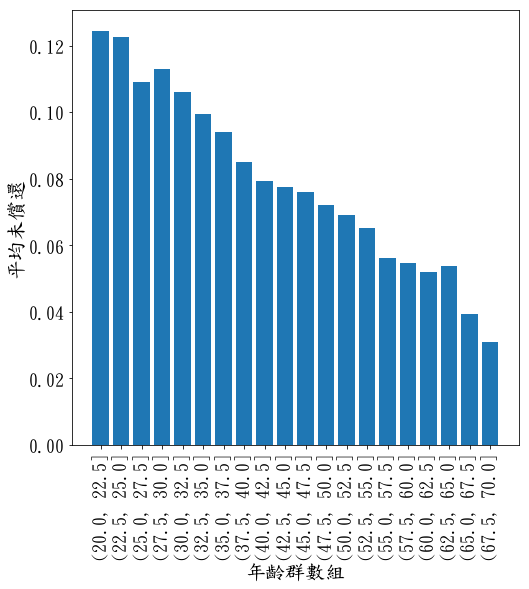

In [7]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# Plot labeling
plt.yticks(fontsize=18)
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 90,fontsize=18)
plt.xlabel('年齡群數組', fontsize=20)
plt.ylabel('平均未償還', fontsize=20)